[[ 1.63175911e-01  2.80166500e-01 -1.66486040e-16 -1.46706963e-16]
 [-9.25416578e-01 -7.69751131e-01 -9.06307787e-01 -7.98635510e-01]
 [ 3.42020143e-01  5.73576436e-01  4.22618262e-01  6.01815023e-01]]


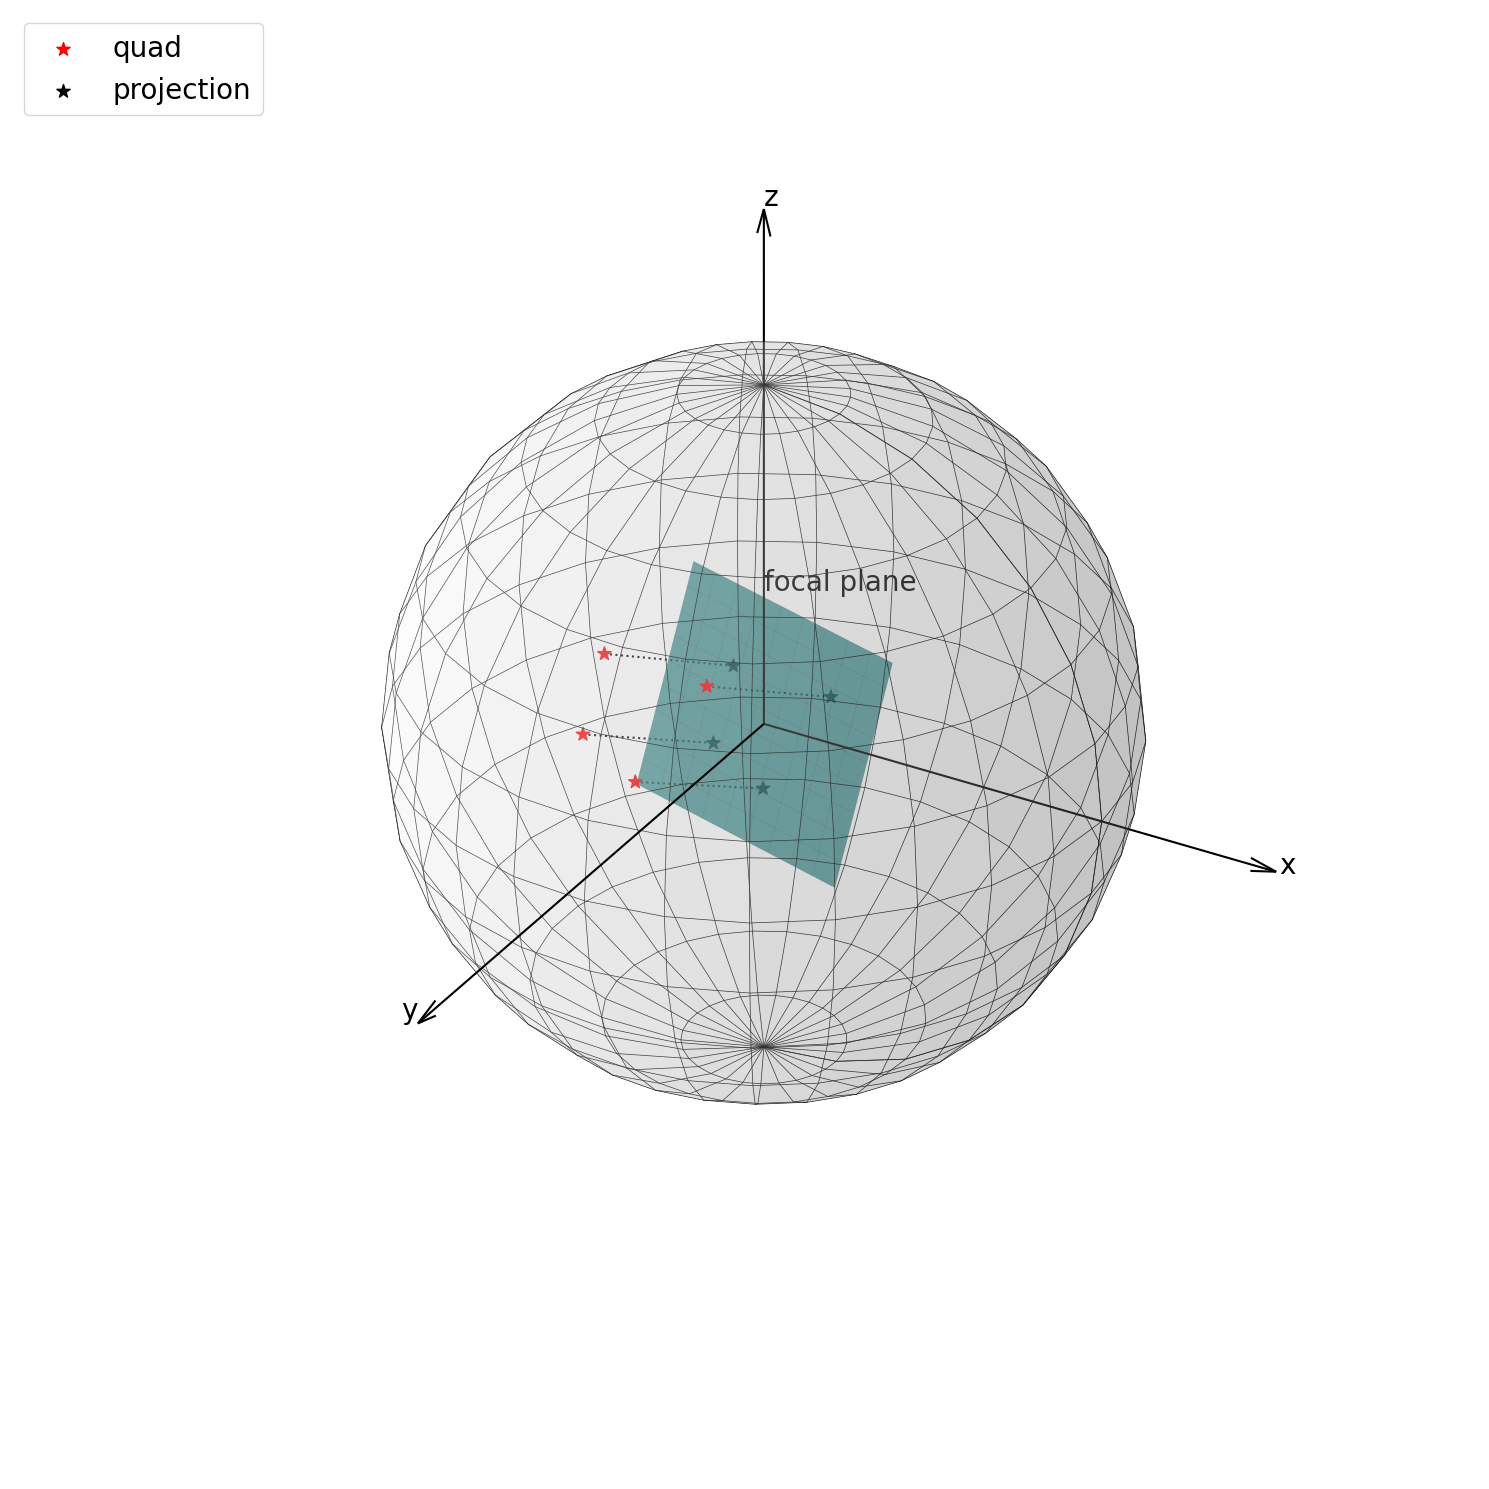

In [1]:
""" plot a globe with lines of long and lat"""
import numpy as np
import matplotlib.pyplot as plt

# create a figure
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# create a sphere
u, v = np.mgrid[0:2*np.pi:30j, 0:np.pi:15j]
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="k", linewidth=0.5)
# plot the sphere surface
ax.plot_surface(x, y, z, color="w", alpha=0.2)



# create a quad within a 20 deg box
quad = [[280, 20], [290, 35], [270, 25], [270, 37]]
# convert each point in quad from spherical coordinates into cartesian
# coordinates
quad = np.array(quad)
quad = np.radians(quad)
quad = np.array([np.cos(quad[:, 1])*np.cos(quad[:, 0]),
                    np.cos(quad[:, 1])*np.sin(quad[:, 0]),
                    np.sin(quad[:, 1])])

# find the centroid of the quad
quad_centroid = np.mean(quad, axis=1)


print(quad)                    
# plot the quad
ax.scatter(quad[0],quad[1],quad[2], color="r", marker='*', s=100, alpha = 1, label="quad")

#plot the axis as arrows
ax.quiver(0, 0, 0, 1.5, 0, 0, color="k", arrow_length_ratio=0.05)
ax.quiver(0, 0, 0, 0, -1.7, 0, color="k", arrow_length_ratio=0.05)
ax.quiver(0, 0, 0, 0, 0, 1.5, color="k", arrow_length_ratio=0.05)

# plot the 2d plane that has a point at (0,0,0) and it's normal vector is the quad_centroid vector
# create a meshgrid
x, y = np.mgrid[-0.3:0.3:10j, -0.15:0.15:10j]
# create a plane
z = (-quad_centroid[0]*x - quad_centroid[1]*y)/quad_centroid[2]
# plot the plane
ax.plot_surface(x, y, z, color="cyan", alpha=0.7, edgecolor="k", linewidth=0.1)

## plot the plane normal vector
#ax.quiver(0, 0, 0, quad_centroid[0], quad_centroid[1], quad_centroid[2], color="r", arrow_length_ratio=0.05)


# project the quad onto the plane
# find the projection of each point in quad onto the plane
quad_proj = np.zeros((3, 4))
for i in range(4):
    quad_proj[:, i] = quad[:, i] - np.dot(quad[:, i], quad_centroid)*quad_centroid
# plot the projection
ax.scatter(quad_proj[0], quad_proj[1], quad_proj[2], color="k", marker='*', s=100, alpha = 1, label = "projection")

#plot a dotted line between the quad and its projection
for i in range(4):
    ax.plot([quad[0, i], quad_proj[0, i]], [quad[1, i], quad_proj[1, i]], [quad[2, i], quad_proj[2, i]], color="k", linestyle="dotted")

# plot a red polygon between the quad points, a black polygon between the quad_proj points




"""
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
"""

#include a large legend
ax.legend(loc="upper left", fontsize=20)

# xl legend
ax.text(1.51, 0, 0, "x", color="k", fontsize=20)
# yl legend 
ax.text(-0.05, -1.7, 0, "y", color="k", fontsize=20)
# zl legend
ax.text(0, 0, 1.51, "z", color="k", fontsize=20)

# add text above the plane
ax.text(0, 0, 0.4, "focal plane", color="k", fontsize=20)

plt.axis('off')

ax.set_aspect("equal")
plt.tight_layout()
plt.show()



